# 1. Project Overview
● Objective: Students should define the project's goal or main question.
○ What equipment is used for which exercises and at what experience levels? 
○ This data source comes from
https://www.kaggle.com/datasets/niharika41298/gym-exercise-data
Exercises by type, main bodypart worked, equipment used and level of experience. 

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import os 

# 2. Data Collection and Loading
● Load Data: Use Pandas to load a dataset (CSV, Excel, or database).
● Initial Check: Display the first few rows and basic information about the dataset, noting
column names, types, and missing values.
● Selection Options:
○ Choose a dataset you find interesting (Video game sales, Sports stats, Carbon
emissions, etc.).
○ Choose which columns or data to focus on and drop the rest.

In [2]:
exercise_data = pd.read_csv(r'megaGymDataset.csv')
exercise_data.head()

,Unnamed: 0,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
2,2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
3,3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
4,4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,NaN


In [3]:
exercise_data.tail()

,Unnamed: 0,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
2913,2913,EZ-bar skullcrusher-,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,8.1,Average
2914,2914,Lying Close-Grip Barbell Triceps Press To Chin,NaN,Strength,Triceps,E-Z Curl Bar,Beginner,8.1,Average
2915,2915,EZ-Bar Skullcrusher - Gethin Variation,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN,NaN
2916,2916,TBS Skullcrusher,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN,NaN
2917,2917,30 Arms EZ-Bar Skullcrusher,NaN,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN,NaN


In [4]:
exercise_data.shape

(2918, 9)

In [5]:
df_shape = exercise_data.shape
print(f'The dataframe has {df_shape[0]} rows and {df_shape[1]} columns')

The dataframe has 2918 rows and 9 columns


In [6]:
exercise_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918 entries, 0 to 2917
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2918 non-null   int64  
 1   Title       2918 non-null   object 
 2   Desc        1368 non-null   object 
 3   Type        2918 non-null   object 
 4   BodyPart    2918 non-null   object 
 5   Equipment   2886 non-null   object 
 6   Level       2918 non-null   object 
 7   Rating      1031 non-null   float64
 8   RatingDesc  862 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 205.3+ KB


# 3. Data Cleaning and Preparation
● Handle Missing Values: Choose how to handle missing values (drop, fill, or leave as is).
○ Explain why you did this drop, fill, etc.
● Data Type Adjustments: Convert columns to appropriate types (e.g., dates to
datetime).
● Feature Engineering: Create at least one new feature from existing data.
○ Example: extracting the month from a date
○ Calculate the percentage
○ Combine first and last name columns into a full name column

In [7]:
print(exercise_data.isnull().any().any())

True


In [8]:
exercise_data.isnull().sum()

Unnamed: 0       0
Title            0
Desc          1550
Type             0
BodyPart         0
Equipment       32
Level            0
Rating        1887
RatingDesc    2056
dtype: int64

In [9]:
exercise_data.isnull().any(axis=0)

Unnamed: 0    False
Title         False
Desc           True
Type          False
BodyPart      False
Equipment      True
Level         False
Rating         True
RatingDesc     True
dtype: bool

In [10]:
exercise_data.columns

Index(['Unnamed: 0', 'Title', 'Desc', 'Type', 'BodyPart', 'Equipment', 'Level',
       'Rating', 'RatingDesc'],
      dtype='object')

In [11]:
list(exercise_data.columns)

['Unnamed: 0',
 'Title',
 'Desc',
 'Type',
 'BodyPart',
 'Equipment',
 'Level',
 'Rating',
 'RatingDesc']

In [12]:
exercise_data['Type'].value_counts()

Type
Strength                 2545
Stretching                147
Plyometrics                97
Powerlifting               37
Cardio                     35
Olympic Weightlifting      35
Strongman                  22
Name: count, dtype: int64

In [13]:
exercise_data['BodyPart'].value_counts()


BodyPart
Abdominals     662
Quadriceps     646
Shoulders      340
Chest          262
Biceps         168
Triceps        151
Lats           124
Hamstrings     121
Middle Back    118
Lower Back      97
Glutes          81
Calves          47
Forearms        31
Traps           24
Abductors       21
Adductors       17
Neck             8
Name: count, dtype: int64

In [14]:
exercise_data['Equipment'].value_counts()


Equipment
Body Only        1078
Dumbbell          516
Barbell           282
Other             254
Cable             226
Machine           175
Kettlebells       149
Bands             100
Medicine Ball      38
Exercise Ball      35
E-Z Curl Bar       22
Foam Roll          11
Name: count, dtype: int64

In [15]:
exercise_data['Level'].value_counts()

Level
Intermediate    2446
Beginner         459
Expert            13
Name: count, dtype: int64

In [16]:
pd.set_option('display.float_format', '{:.2f}'.format)

exercise_data.describe()

,Unnamed: 0,Rating
count,2918.00,1031.00
mean,1458.50,5.92
std,842.50,3.58
min,0.00,0.00
25%,729.25,3.00
50%,1458.50,7.90
75%,2187.75,8.70
max,2917.00,9.60


In [17]:
exercise_data.columns = exercise_data.columns.str.title()
exercise_data.head(2)

,Unnamed: 0,Title,Desc,Type,Bodypart,Equipment,Level,Rating,Ratingdesc
0,0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.00,NaN
1,1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN


In [18]:
cols_to_drop = ['Unnamed: 0', 'Desc', 'Rating', 'Ratingdesc']
exercise_data_cleaned = exercise_data.drop(columns = cols_to_drop)
exercise_data_cleaned.head()

,Title,Type,Bodypart,Equipment,Level
0,Partner plank band row,Strength,Abdominals,Bands,Intermediate
1,Banded crunch isometric hold,Strength,Abdominals,Bands,Intermediate
2,FYR Banded Plank Jack,Strength,Abdominals,Bands,Intermediate
3,Banded crunch,Strength,Abdominals,Bands,Intermediate
4,Crunch,Strength,Abdominals,Bands,Intermediate


In [19]:
push_bodyparts = ['Quadricps', 'Shoulders', 'Chest', 'Triceps', 'Forearms', 'Adductors', 'Neck', 'Abdominals']
exercise_data['Push'] = exercise_data['Bodypart'].isin(push_bodyparts)
exercise_data.tail(2)




,Title,Type,Bodypart,Equipment,Level,Push
2916,TBS Skullcrusher,Strength,Triceps,E-Z Curl Bar,Intermediate,True
2917,30 Arms EZ-Bar Skullcrusher,Strength,Triceps,E-Z Curl Bar,Intermediate,True


In [20]:
pull_bodyparts = ['Biceps', 'Lats', 'Hamstring', 'Middle Back', 'Lower Back', 'Glutes', 'Calves', 'Traps', 'Abductors']
exercise_data['Pull'] = exercise_data['Bodypart'].isin(pull_bodyparts)
exercise_data.tail(2)

,Title,Type,Bodypart,Equipment,Level,Push,Pull
2916,TBS Skullcrusher,Strength,Triceps,E-Z Curl Bar,Intermediate,True,False
2917,30 Arms EZ-Bar Skullcrusher,Strength,Triceps,E-Z Curl Bar,Intermediate,True,False


# 4. Exploratory Data Analysis (EDA)
● Descriptive Statistics: Provide summary statistics (mean, median, min, max) for
numerical columns.
● Data Visualizations:
○ Required: One visualization (e.g., line plot) if time-series data is relevant.
○ Optional: Additional visuals like bar charts for comparisons, histograms for
distributions, or scatter plots for relationships.

<Axes: xlabel='Equipment'>

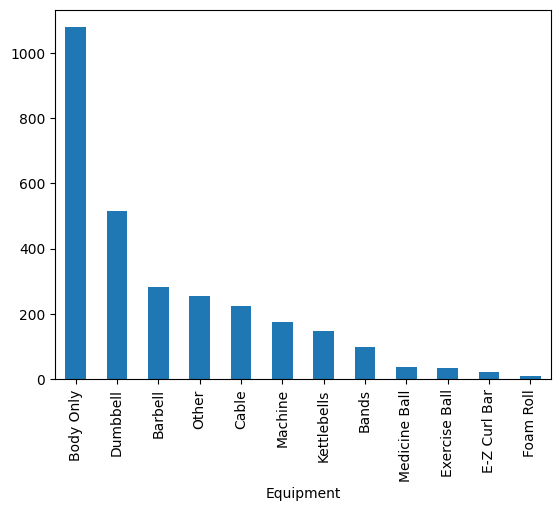

In [21]:
exercise_data['Equipment'].value_counts().plot(kind='bar', rot=90)

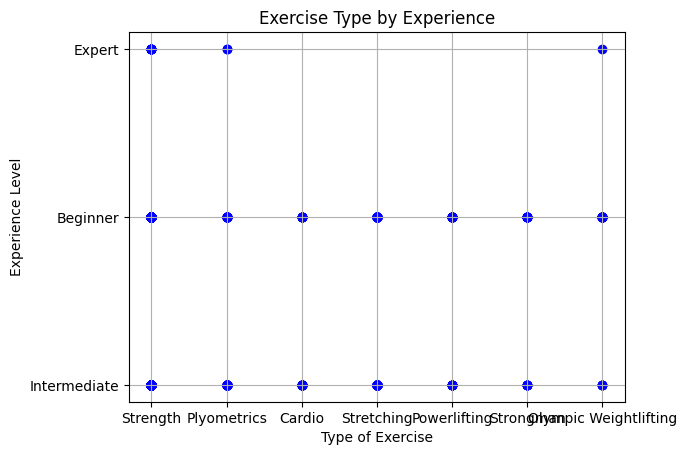

In [22]:
x = exercise_data['Type']
y = exercise_data['Level']

plt.scatter(x, y, color='blue', label='Data Points')
plt.grid(True)
plt.xlabel('Type of Exercise')
plt.ylabel('Experience Level')
plt.title('Exercise Type by Experience')

plt.show()

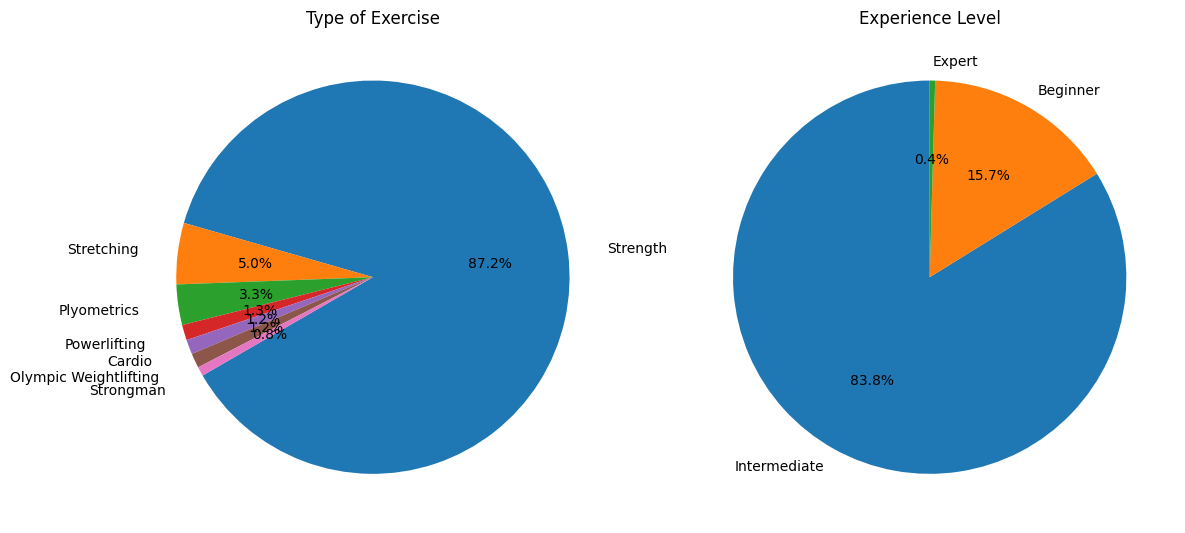

In [23]:
# Count the values in 'type' and 'level'
type_counts = exercise_data['Type'].value_counts()
level_counts = exercise_data['Level'].value_counts()

    # Define the subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot for 'type' 
axes[0].pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=210,
                labeldistance=1.2)  
axes[0].set_title('Type of Exercise')

    # Plot for 'level'
axes[1].pie(level_counts, labels=level_counts.index, autopct='%1.1f%%', startangle=90, 
                labeldistance=1.1)  
axes[1].set_title('Experience Level')

plt.tight_layout()
plt.show()

In [24]:
cross_tab_equip_level = pd.crosstab(exercise_data['Equipment'], exercise_data['Level'])
print(cross_tab_equip_level)

Level          Beginner  Expert  Intermediate
Equipment                                    
Bands                20       0            80
Barbell              99       5           178
Body Only            82       3           993
Cable                26       0           200
Dumbbell             51       1           464
E-Z Curl Bar          4       0            18
Exercise Ball         6       0            29
Foam Roll             4       0             7
Kettlebells          32       1           116
Machine              23       1           151
Medicine Ball        10       0            28
Other                77       2           175


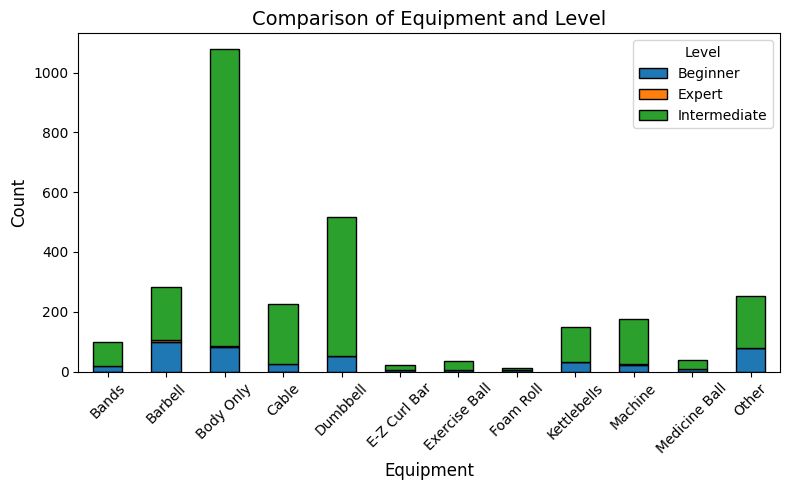

In [25]:
equipment_level_counts = exercise_data.groupby(['Equipment', 'Level']).size().unstack()
equipment_level_counts.plot(kind='bar', stacked=True, figsize=(8, 5), edgecolor='black')

plt.title('Comparison of Equipment and Level', fontsize=14)
plt.xlabel('Equipment', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [26]:
cross_tab_type_level = pd.crosstab(exercise_data['Type'], exercise_data['Level'])
print(cross_tab_type_level)

Level                  Beginner  Expert  Intermediate
Type                                                 
Cardio                        9       0            26
Olympic Weightlifting        30       1             4
Plyometrics                  35       2            60
Powerlifting                 27       0            10
Strength                    279      10          2256
Stretching                   63       0            84
Strongman                    16       0             6


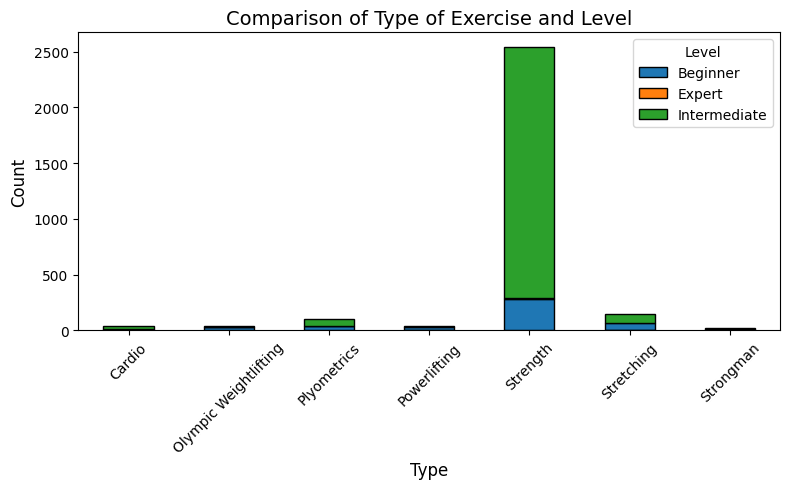

In [27]:
type_level_counts = exercise_data.groupby(['Type', 'Level']).size().unstack()
type_level_counts.plot(kind='bar', stacked=True, figsize=(8, 5), edgecolor='black')

plt.title('Comparison of Type of Exercise and Level', fontsize=14)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [28]:
cross_tab_equip_type = pd.crosstab(exercise_data['Equipment'], exercise_data['Type'])
print(cross_tab_equip_type)

Type           Cardio  Olympic Weightlifting  Plyometrics  Powerlifting  \
Equipment                                                                 
Bands               0                      0            0             4   
Barbell             0                     35            0            29   
Body Only          20                      0           54             0   
Cable               0                      0            0             0   
Dumbbell            0                      0            4             1   
E-Z Curl Bar        0                      0            0             0   
Exercise Ball       0                      0            1             0   
Foam Roll           0                      0            0             0   
Kettlebells         0                      0            1             0   
Machine             8                      0            0             1   
Medicine Ball       0                      0           14             0   
Other               7    

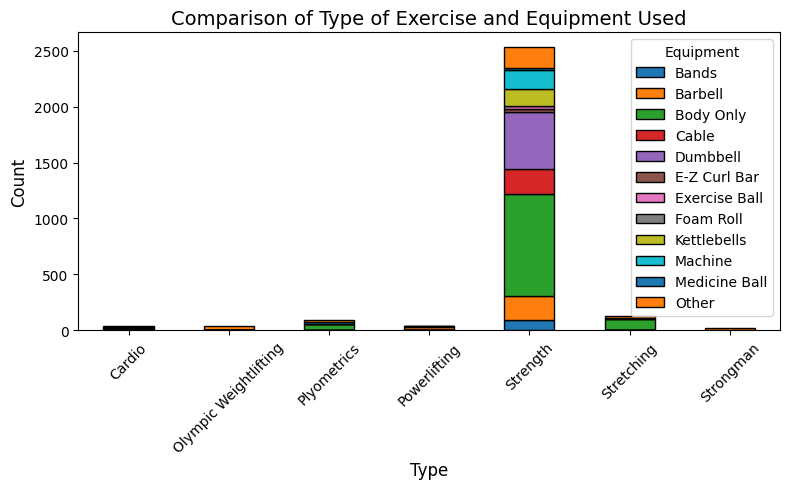

In [29]:
type_equip_counts = exercise_data.groupby(['Type', 'Equipment']).size().unstack()
type_equip_counts.plot(kind='bar', stacked=True, figsize=(8, 5), edgecolor='black')

plt.title('Comparison of Type of Exercise and Equipment Used', fontsize=14)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 5. Analysis and Insights
● Findings: Summarize any patterns observed and address the main project question.
● Supporting Data: Reference specific statistics or plot features to back up findings.
Strength exercises using the most variety of equipment, while olympic weightlifting only utilizes barbells and no other equipment. 


# 6. Conclusion and Recommendations (10 points)
● Summarize: Present the main conclusions drawn from the analysis.
● Recommendations: Based on findings, suggest actions or further analysis.
Strength excercises are most suited for all levels of experience and utilize the largest variety of equipment. 